# Udacity Data Analysis Project: Investigate a Dataset (TDMb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different.

In this presentation, based on this dataset various questions will be answered for the curious minds. For example, what is the distribution of year movies were produced? who were the top actors, directors, and movie genres? what are the distributions of movies runtime, average vote? 

So Lets start exploring the dataset.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# dimension of the dataset.
df.shape

(10866, 21)

The TMDb dataset contain 10866 rows and 21 columns.

In [4]:
# check for the dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# change release date to datetime object.
df['release_date'] = pd.to_datetime(df['release_date'])

In [6]:
# columns with missing values
cols_with_nan = ['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres',
                'production_companies']

# count the sum of missing values.
def num_of_nan(column):
    return df[column].isna().sum()

print('Columns with missing values:')

for col in cols_with_nan:
    print('The {} column has {} missing values.'.format(col, num_of_nan(col)))

Columns with missing values:
The imdb_id column has 10 missing values.
The cast column has 76 missing values.
The homepage column has 7930 missing values.
The director column has 44 missing values.
The tagline column has 2824 missing values.
The keywords column has 1493 missing values.
The overview column has 4 missing values.
The genres column has 23 missing values.
The production_companies column has 1030 missing values.


In [7]:
# list of columns of the dataset.
df.columns.values

array(['id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype=object)

The columns id, imdb_id, homepage, keywords, overview, tagline, budget_adj, revenue_adj do not contain useful information, therefore, need to be dropped from the dataset.

In [8]:
# list of columns to drop
cols_to_drop = ['id','imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj']

# drop some columns.
def drop_col(column):
    return df.drop([column], axis=1, inplace=True)

print('The following columns are dropped:')

for col in cols_to_drop:
    drop_col(col)
    print('- {}'.format(col))

The following columns are dropped:
- id
- imdb_id
- homepage
- tagline
- keywords
- overview
- budget_adj
- revenue_adj


In [9]:
# count total duplicates
df.duplicated().sum()

1

In [10]:
# drop all duplicates
df.drop_duplicates(inplace=True)

In [11]:
# check for null values.
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [12]:
# fill null with zero.
df.fillna(0, inplace=True)

In [13]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [14]:
# check the necessary columns was dropped.
df.shape

(10865, 13)

**Descriptive statistics of the dataset.**

In this section basic descriptive statistics are being presented for each column from the dataset.

In [15]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


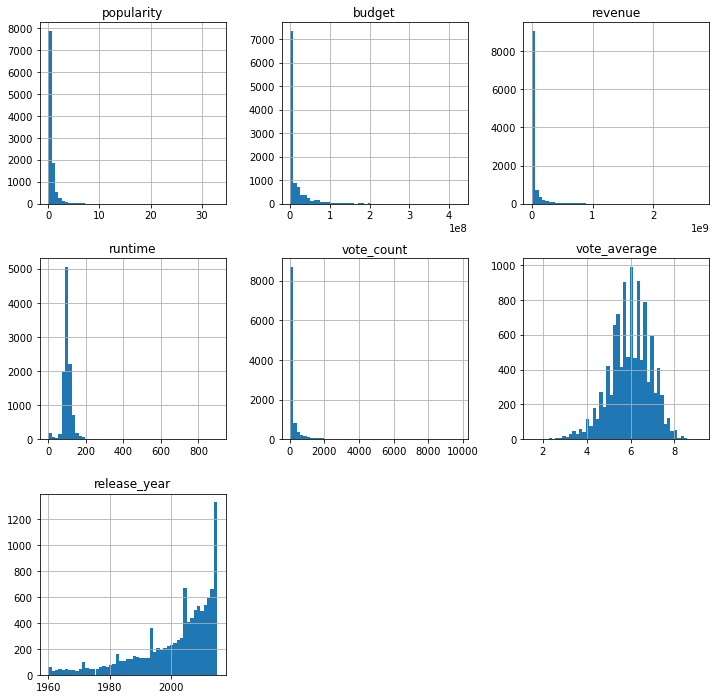

In [16]:
# preview overall distribution of dataframe
df.hist(figsize=(12,12), bins=50);

from the above histograms, there seems to be many 0 values on popularity, budget and revenue. Rows containing these values might need to be removed for more accurate results.

In [17]:
# check the numbers of rows with 0
print('The number of rows with zeros is {}.'.format(df[df['popularity']==0].shape[0]))
print('The number of rows with zeros are {}.'.format(df[df['budget']==0].shape[0]))
print('The number of rows with zeros are {}.'.format(df[df['revenue']==0].shape[0]))

The number of rows with zeros is 0.
The number of rows with zeros are 5696.
The number of rows with zeros are 6016.


In [18]:
# fill zero with nan and drop.
df['popularity'] = df['popularity'].replace(0, np.NaN)
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

df.dropna(inplace=True)

In [19]:
# check that the changes were made in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3854 non-null   float64       
 1   budget                3854 non-null   float64       
 2   revenue               3854 non-null   float64       
 3   original_title        3854 non-null   object        
 4   cast                  3854 non-null   object        
 5   director              3854 non-null   object        
 6   runtime               3854 non-null   int64         
 7   genres                3854 non-null   object        
 8   production_companies  3854 non-null   object        
 9   release_date          3854 non-null   datetime64[ns]
 10  vote_count            3854 non-null   int64         
 11  vote_average          3854 non-null   float64       
 12  release_year          3854 non-null   int64         
dtypes: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What year is most movies produced.

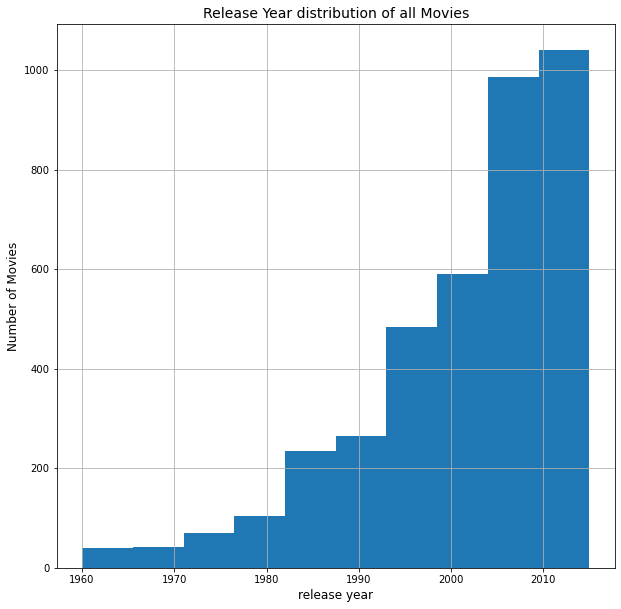

In [20]:
# which year(release_year) is movies produced the most.
df.hist('release_year', figsize=(10,10))
plt.title('Release Year distribution of all Movies', fontsize=14)
plt.xlabel('release year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12);

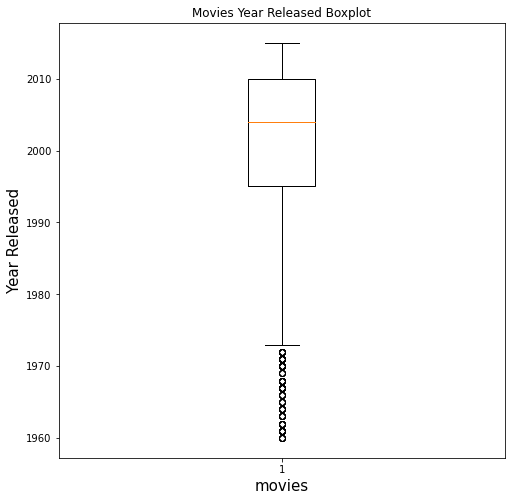

In [21]:
# boxplot for movies year released.
data = df['release_year']

fig = plt.figure(figsize=(8,8))
plt.boxplot(data)
plt.title('Movies Year Released Boxplot')
plt.xlabel('movies', fontsize=15)
plt.ylabel('Year Released', fontsize=15);
plt.show();

The above showed that majority of the movies were produced between 1995 and 2010.

### Research Question 2: What are the top casts, directors and genres?

In [23]:
# lets create a dataframe to study.
df.loc[:, ['original_title', 'cast', 'director', 'genres']].head(3)

,original_title,cast,director,genres
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller


In [24]:
def extract_data(column):
    df['cast'] = df['cast'].astype(str)
    df['director'] = df['director'].astype(str)
    
    # from column entered, seperate the column string by '|' 
    all_data = df[column].str.cat(sep='|')
   
    # store the separated values by series
    all_data = pd.Series(all_data.split('|'))
 
    # count the values and return in descending order.
    count = all_data.value_counts(ascending=False)
    
    return count

In [25]:
# use the function to get count of casts.
cast_count = extract_data('cast')
cast_count = pd.DataFrame(cast_count)

top_cast = cast_count.head(10)
top_cast

,0
Robert De Niro,52
Bruce Willis,46
Samuel L. Jackson,44
Nicolas Cage,43
Matt Damon,36
Johnny Depp,35
Tom Hanks,34
Morgan Freeman,34
Harrison Ford,34
Brad Pitt,34


In [26]:
 # use the function to get count of genres.
genres_count = extract_data('genres')
genres_count = pd.DataFrame(genres_count)

top_genres = genres_count.head(10)
top_genres   

,0
Drama,1756
Comedy,1358
Thriller,1204
Action,1085
Adventure,749
Romance,667
Crime,651
Science Fiction,519
Horror,463
Family,425


In [27]:
 # use the function to get count of directors.
director_count = extract_data('director')
director_count = pd.DataFrame(director_count)

top_director = director_count.head(10)
top_director

,0
Steven Spielberg,28
Clint Eastwood,24
Ridley Scott,21
Woody Allen,18
Robert Rodriguez,17
Tim Burton,17
Martin Scorsese,17
Steven Soderbergh,17
Oliver Stone,15
Renny Harlin,15


### Research Question 3: Which movies make the most profit?

In [28]:
# create a new column for the profit.
df['profit'] = df['revenue'] - df['budget']

#check that the profit column is in the dataframe.
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08


In [29]:
# sort the dataframe by profit column and display top 15 rows.
df.sort_values(['profit'], ascending=False).head(15)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
1386,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.544506e+09
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.868178e+09
5231,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,1.645034e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.316249e+09
4361,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,1.299558e+09
3374,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.202818e+09
14,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,1.125036e+09
5422,6.112766,150000000.0,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.124219e+09
8094,1.136610,22000000.0,1.106280e+09,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,201,5.6,1995,1.084280e+09


The above display top 10 movies of all time that earned most profit according to the data.

## **Distribution of Movies runtime**

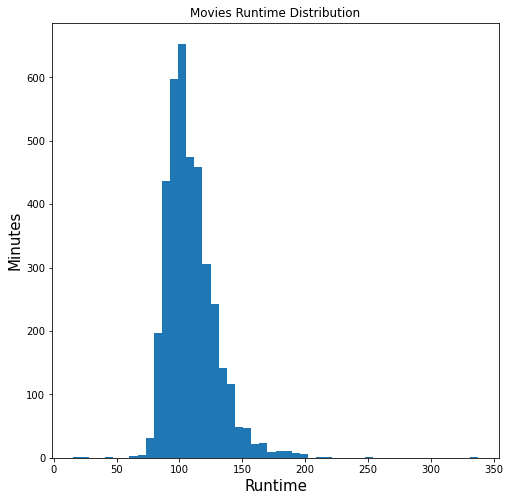

In [30]:
# create histogram of the movies runtime distribution.
data = df['runtime']

fig = plt.figure(figsize=(8,8))
plt.hist(data, bins=50)
plt.title('Movies Runtime Distribution')
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Minutes', fontsize=15);
plt.show();

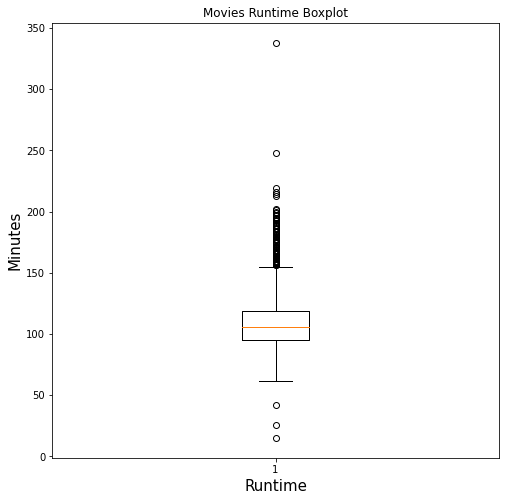

In [31]:
# boxplot for runtime.
data = df['runtime']

fig = plt.figure(figsize=(8,8))
plt.boxplot(data)
plt.title('Movies Runtime Boxplot')
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Minutes', fontsize=15);
plt.show();

* From the plots above, the most movies runtime is between  90 to 120 minutes.
* There exist some outliers like the movie runtime value of 0 and 900 amongst others

## **Distribution of Movies Vote Average**

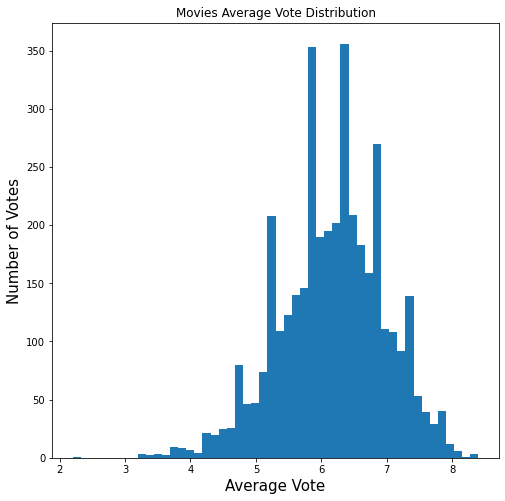

In [32]:
# create histogram of the movies avearge vote distribution.
data = df['vote_average']

fig = plt.figure(figsize=(8,8))
plt.hist(data, bins=50)
plt.title('Movies Average Vote Distribution')
plt.xlabel('Average Vote', fontsize=15)
plt.ylabel('Number of Votes', fontsize=15);
plt.show();

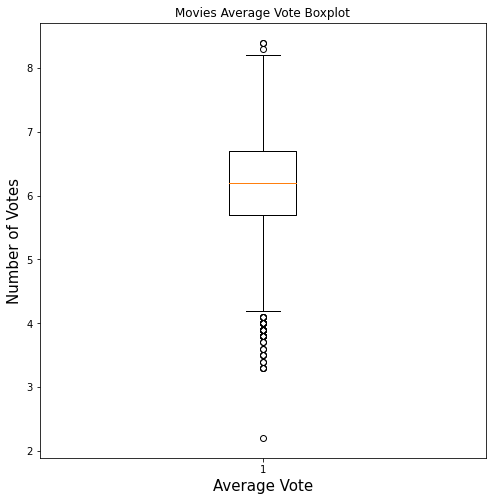

In [33]:
# boxplot for vote average.
data = df['vote_average']

fig = plt.figure(figsize=(8,8))
plt.boxplot(data)
plt.title('Movies Average Vote Boxplot')
plt.xlabel('Average Vote', fontsize=15)
plt.ylabel('Number of Votes', fontsize=15);
plt.show();

From the plots above, the majority of the movies average vote is between  5.5 to 6.5.

<a id='conclusions'></a>
## Conclusions


The TMDb movies dataset provides many information on all movies. After Data Wrangling, null values, duplicates and 0 values were removed from the dataset to provide accurate results. Incorrrect datatype were correted and new column (profit) were created to analyse movies with most profit.

Histogram and Box plot was made to help visualize and better understand the dataset to answer questions. From the results above, its showed the movies with top profits and top cast, genres, and directors. Aslo distribution of movies produced by year, movie average vote and runtime were displayed.

* Runtime: Average runtime is 102 minutes.
* Year Release: Most movies were released between 1995 to 2010.
* Average Vote: Average vote is 5.9
* Top Cast: Robert De Niro
* Top Director: Steven Spielberg
* Top Genre: Drama

## **Limitations:**

The TDMb movies dataset features were successfully analyzed, there were some information which was removed such as rows containing nulls and 0 values which would definately alter results. Also, there exist some outliers in the dataset which might be as a result of human errors.

## **Sources.**

* Pandas Documentation
* Stackoverflow
* Kaggle guide
* Github Projects

